In [7]:
# load necessary libraries. install what you don't have
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time

#import io # new and important wow
#import keras ## new. install tensorflow?
#import argparse


In [8]:
## Testing out the MET Museum API

In [9]:
'''
EDA Questions to explore:

What is the frequency of European Artwork across the 1970-1990s period? 
If one decade dominates in terms of amount of pieces maybe we need to ensure
that we sample 1000 images from each decade for a more uniform sample

What is the frequency of drawings to photographs during the time period?
If there is an imbalance maybe we need to sample a set amount of each.

What is the average pixel dimensions of the images, based on this we have
justification for making each photo the same pixel size

How many NAs (year)


'''

'\nEDA Questions to explore:\n\nWhat is the frequency of European Artwork across the 1970-1990s period? \nIf one decade dominates in terms of amount of pieces maybe we need to ensure\nthat we sample 1000 images from each decade for a more uniform sample\n\nWhat is the frequency of drawings to photographs during the time period?\nIf there is an imbalance maybe we need to sample a set amount of each.\n\nWhat is the average pixel dimensions of the images, based on this we have\njustification for making each photo the same pixel size\n\nHow many NAs (year)\n\n\n'

In [10]:
def get_image_data(a, b, c): #input is in department number and department name
    url_test = "https://collectionapi.metmuseum.org/public/collection/v1"
    departments = ("/search?departmentId=" + str(a) +"&hasImages=true&dateBegin=1800&dateEnd=2000&q=" + b)
    response = requests.get(url_test+departments)
    if response.status_code == 200 :
        print("API request successful!")
        data = response.json()
    else:
        print("Failed to retrieve data: {response.status_code}")

    print("Total Items Retrieved From " + b + " department: " + str(data['total']))
    
    img_url = []
    date_list = []
    domainList = []
    ID_list = data['objectIDs']
    
    index_val = 0 # if the distribution of years is wonky might want to consider random selection?
    counter_val = 0

    while counter_val <c: #set sample size
        object_id = ID_list[index_val]

        url_object = "https://collectionapi.metmuseum.org/public/collection/v1/objects/" 

        reponse_object = requests.get(url_object+str(object_id))

        if reponse_object.status_code == 200:
            data_ob = reponse_object.json()

            image_url = data_ob['primaryImage']
            if image_url != "" and data_ob.get("isPublicDomain"):
                img_url.append(image_url)
                date_val=data_ob['objectBeginDate']
                date_list.append(date_val)
                domainList.append(data_ob.get("isPublicDomain"))
            
                index_val+= 1
                counter_val+= 1
            else:
                index_val+=1
                counter_val=counter_val
            
            
            
            #conditional statement 

            #img_rep = requests.get(image_url).content
            #img = plt.imread(io.BytesIO(img_rep), format='JPG')
            #plt.imshow(img)

        # and this can be read directly as a np array i g? 
        else:
            #print("Failed to retrieve url")
            index_val+= 1
            counter_val= counter_val 
            

        
        time.sleep(0.05)
    df = {'Year': date_list,
        'URL': img_url,
        'isPublic' : domainList
        }
    df = pd.DataFrame(df)   
    df['Type'] = b
    return df
  

In [11]:
# code to show an image/process image characteristics.
'''
img_rep = requests.get(image_url).content
    img = plt.imread(io.BytesIO(img_rep), format='JPG')
    plt.imshow(img)
'''
# right now it is set to get 20 samples which is going to take 
# a few minutes in the first run. ideally we push to about 500? 


"\nimg_rep = requests.get(image_url).content\n    img = plt.imread(io.BytesIO(img_rep), format='JPG')\n    plt.imshow(img)\n"

In [12]:
dr_url_list = get_image_data(9,"drawing", 2000)
pt_url_list = get_image_data(11,"painting", 750)
print(len(dr_url_list), len(pt_url_list))

API request successful!
Total Items Retrieved From drawing department: 13438
API request successful!
Total Items Retrieved From painting department: 1014
2000 750


In [13]:
pt_url_list.head()


,Year,URL,isPublic,Type
0,1866,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting
1,1804,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting
2,1804,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting
3,1846,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting
4,1810,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting


In [14]:
# we can take 45 from each decade and have a total of 405 each cateogry, with a sample size of 810 in total. 
# we reach outside of index when i try to get 800 paintings so ig they just don't have 800 painting urls, but they do have at least 750

# Ensure Year is numeric
pt_url_list['Year'] = pd.to_numeric(pt_url_list['Year'], errors='coerce')
dr_url_list['Year'] = pd.to_numeric(dr_url_list['Year'], errors='coerce')
# make a decade column --> groupby and sample the column 45 each value of decade column? 

def dec_column(df):
    decade = []

    for x in range(len(df)):
        yr_val = df['Year'][x]
        if (yr_val < 1810 ):
            decade.append('1800s')
        elif (yr_val >= 1810 and yr_val < 1820):
            decade.append('1810s')
        elif (yr_val >= 1820 and yr_val < 1830):
            decade.append('1820s')
        elif (yr_val >= 1830 and yr_val < 1840):
            decade.append('1830s')
        elif (yr_val >= 1840 and yr_val < 1850):
            decade.append('1840s')
        elif (yr_val >= 1850 and yr_val < 1860):
            decade.append('1850s')
        elif (yr_val >= 1860 and yr_val < 1870):
            decade.append('1870s')
        elif (yr_val >= 1870 and yr_val < 1880):
            decade.append('1870s')
        elif (yr_val >= 1880 and yr_val < 1890):
            decade.append('1880s')
        elif (yr_val >= 1890 and yr_val < 1900):
            decade.append('1890s')
        else:
            decade.append("Post-1900")
        
    df["Decade"] = decade
    return df
dec_column(pt_url_list)
dec_column(dr_url_list)


,Year,URL,isPublic,Type,Decade
0,1865,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s
1,1880,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1880s
2,1911,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,Post-1900
3,1878,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s
4,1878,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s
...,...,...,...,...,...
1995,1875,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s
1996,1850,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1850s
1997,1850,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1850s
1998,1834,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1830s


In [15]:
idx_pt_1800s = pt_url_list[ pt_url_list['Decade'] == 'Post-1900' ].index
pt_url_list.drop(idx_pt_1800s, inplace = True) 

idx_dr_1800s = dr_url_list[ dr_url_list['Decade'] == 'Post-1900' ].index
dr_url_list.drop(idx_dr_1800s, inplace = True) 

pt_19th = pt_url_list.groupby('Decade').apply(lambda x: x.sample(min(len(x), 45)))
dr_19th = dr_url_list.groupby('Decade').apply(lambda x: x.sample(min(len(x), 45)))

pt_19th.columns = ['Year', 'URL', 'Type', 'Era', 'isPublic']
dr_19th.columns = ['Year', 'URL', 'Type', 'Era', 'isPublic']
pt_url_list.head()

,Year,URL,isPublic,Type,Decade
0,1866,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting,1870s
1,1804,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting,1800s
2,1804,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting,1800s
3,1846,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting,1840s
4,1810,https://images.metmuseum.org/CRDImages/ep/orig...,True,painting,1810s


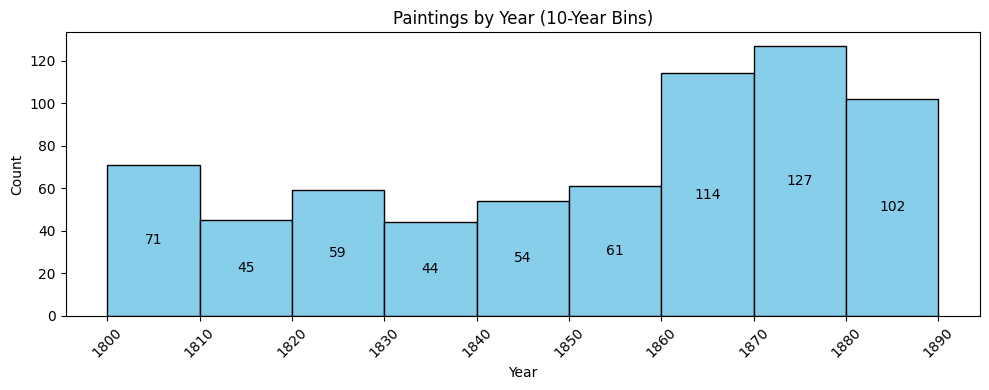

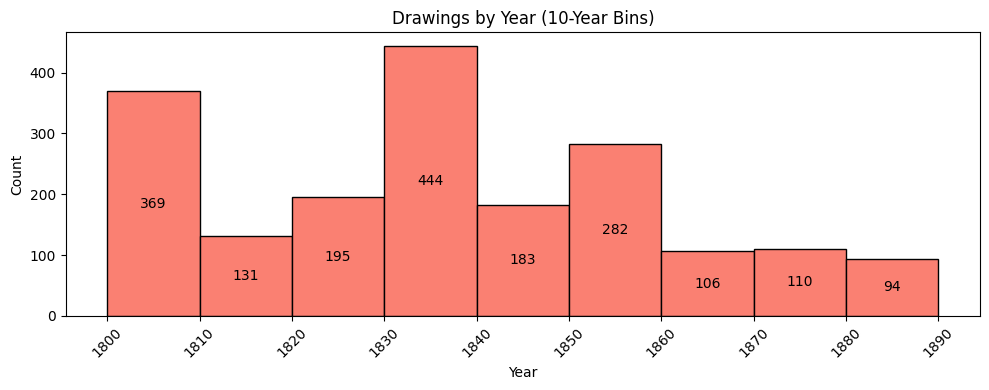

In [16]:

pt_years = pt_url_list['Year']
dr_years = dr_url_list['Year']

bins = range(1800, 1900, 10)

# Plot paintings histogram
plt.figure(figsize=(10, 4))
counts, bins, patches = plt.hist(pt_years, bins=bins, color='skyblue', edgecolor='black')
plt.bar_label(patches, labels=[f'{int(c)}' for c in counts], label_type='center')
plt.title('Paintings by Year (10-Year Bins)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

# Plot drawings histogram
plt.figure(figsize=(10, 4))
counts, bins, patches = plt.hist(dr_years, bins=bins, color='salmon', edgecolor='black')
plt.bar_label(patches, labels=[f'{int(c)}' for c in counts], label_type='center')
plt.title('Drawings by Year (10-Year Bins)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

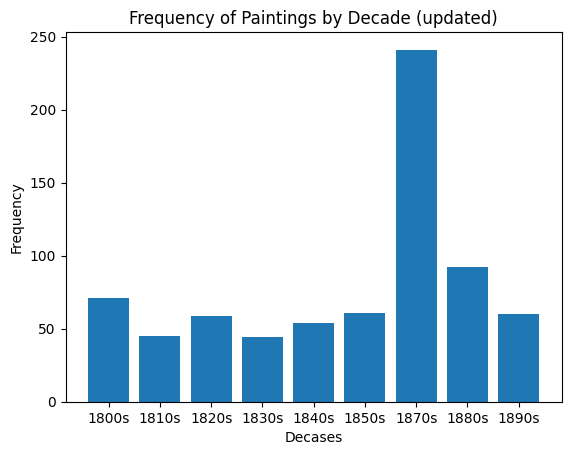

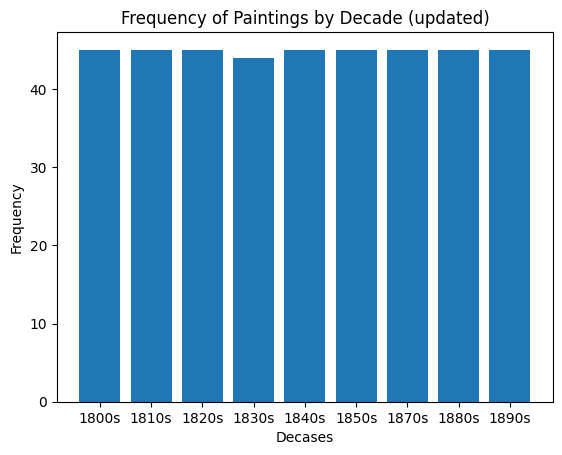

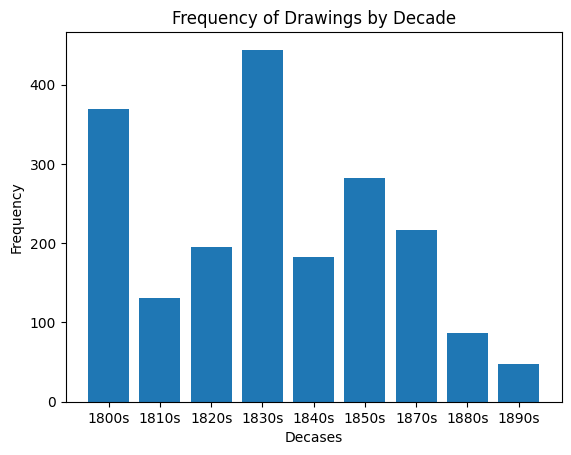

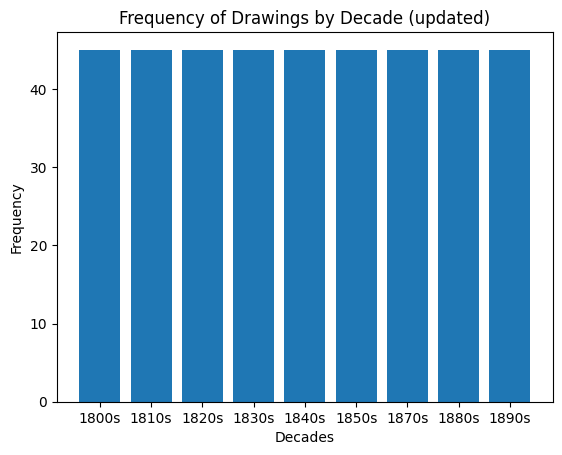

In [17]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
# Plot paintings histogram


#plt.figure(figsize=(10, 4))
grouped_pt_counta = pt_url_list.groupby('Decade').size()
plt.bar(grouped_pt_counta.index, grouped_pt_counta.values)
plt.xlabel('Decases')
plt.ylabel('Frequency')
plt.title('Frequency of Paintings by Decade (updated)')
plt.show()


#plt.figure(figsize=(10, 4))
grouped_pt_count = pt_19th.groupby('Decade').size()
plt.bar(grouped_pt_count.index, grouped_pt_count.values)
plt.xlabel('Decases')
plt.ylabel('Frequency')
plt.title('Frequency of Paintings by Decade (updated)')
plt.show()

# Plot drawings histogram

#plt.figure(figsize=(10, 4))
grouped_dr_counta = dr_url_list.groupby('Decade').size()
plt.bar(grouped_dr_counta.index, grouped_dr_counta.values)
plt.xlabel('Decases')
plt.ylabel('Frequency')
plt.title('Frequency of Drawings by Decade')
plt.show()

#plt.figure(figsize=(10, 4))
grouped_dr_count = dr_19th.groupby('Decade').size()
plt.bar(grouped_dr_count.index, grouped_dr_count.values)
plt.xlabel('Decades')
plt.ylabel('Frequency')
plt.title('Frequency of Drawings by Decade (updated)')
plt.show()

In [18]:
from PIL import Image
from io import BytesIO
from tqdm import tqdm

def get_width(img):
    if img is not None:
        return img.width
    return None

def get_height(img):
    if img is not None:
        return img.height
    return None


def fetch_image_dimensions(df):
    widths = []
    heights = []

    for url in tqdm(df['URL'], desc="Fetching image dimensions"):
        time.sleep(0.05)
        try:
            response = requests.get(url, timeout=5)
            img = Image.open(BytesIO(response.content))
            widths.append(img.width)
            heights.append(img.height)
        except Exception as e:
            print(f"Failed to fetch {url}: {e}")
            widths.append(None)
            heights.append(None)
    
    df = df.copy()
    df['width'] = widths
    df['height'] = heights
    return df

pt_sample = pt_url_list.head(10)
dr_sample = dr_url_list.head(10)

pt_sample = fetch_image_dimensions(pt_sample)
dr_sample = fetch_image_dimensions(dr_sample)

avg_pt_width = pt_sample['width'].dropna().mean()
avg_pt_height = pt_sample['height'].dropna().mean()
avg_dr_width = dr_sample['width'].dropna().mean()
avg_dr_height = dr_sample['height'].dropna().mean()

print(f"Average Painting Size (10 samples): {avg_pt_width:.1f} x {avg_pt_height:.1f} pixels")
print(f"Average Drawing Size (10 samples): {avg_dr_width:.1f} x {avg_dr_height:.1f} pixels")


Fetching image dimensions: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

Average Painting Size (10 samples): 2873.3 x 3670.7 pixels
Average Drawing Size (10 samples): 2602.0 x 3152.8 pixels


In [19]:
pt_sample.head()
dr_sample.head()

,Year,URL,isPublic,Type,Decade,width,height
0,1865,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s,3342,2327
1,1880,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1880s,3629,2518
3,1878,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s,1397,3970
4,1878,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s,2487,2718
5,1878,https://images.metmuseum.org/CRDImages/dp/orig...,True,drawing,1870s,3673,2410


In [20]:
# Reshape the images, make sure to have the needed packages installed
# Goal: 244 x 244, maintain the original aspect ratio/image quality if posssible


'''
Possible guides

https://stackoverflow.com/questions/56718952/how-can-i-classify-different-images-with-various-sizes-and-formats-in-scikit-lea
https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio

'''



'\nPossible guides\n\nhttps://stackoverflow.com/questions/56718952/how-can-i-classify-different-images-with-various-sizes-and-formats-in-scikit-lea\nhttps://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio\n\n'

In [21]:
len(pt_19th)
len(dr_19th)

405

In [ ]:
#Reordering columns because the column titles got mixed up. Doing it after the fact to not disrupt earlier code 

# Reorder and rename columns for pt_19th
pt_19th.columns = ['Year', 'URL', 'isPublic', 'Type', 'Era']
# Reorder and rename columns for dr_19th
dr_19th.columns = ['Year', 'URL', 'isPublic', 'Type', 'Era']

# Save to CSV
pt_19th.to_csv('../DATA/pt_19th.csv', index=False)
dr_19th.to_csv('../DATA/dr_19th.csv', index=False)


In [22]:
#pt_19th.to_csv('../DATA/pt_19th.csv', index=False)
#dr_19th.to_csv('../DATA/dr_19th.csv', index=False)